## Mini Project III

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans

In [12]:
customerInformation = pd.read_csv('twm_customer.csv',sep=";")
accountInformation = pd.read_csv('twm_accounts.csv', sep=";")

In [105]:
def plot_distortions(X,max_clusters=10):
    distortions = []
    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters+1),distortions,marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortions')
    plt.show()

In [93]:
customerAge_Income = customerInformation[['age','income']]

In [97]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [106]:
km.fit_predict(customerAge_Income)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

C:\Users\Jimmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


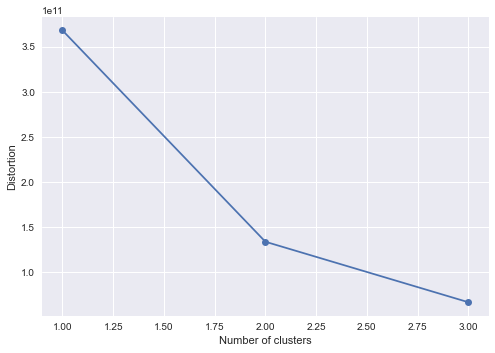

In [104]:
plot_distortions(customerAge_Income,10)

In [ ]:
plt.style.use('seaborn')

In [ ]:
customerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
50,1362729,0,13,5,0,M,1,,Bruce ...,Kraus ...,1223,Vine ...,10104,New York City,NY
51,1362668,0,13,5,0,M,1,,Chiman ...,Boyd ...,16437,37th ...,90750,Long Beach,CA
91,1362523,0,13,5,0,F,1,,Julie ...,Morton ...,8369,Madison ...,90061,Los Angeles,CA
202,1362496,0,13,2,0,M,1,,Douglas ...,McMillen ...,2968,Leek ...,77058,Houston,TX
265,1363064,0,13,5,0,F,1,,Isabel ...,Gold ...,7879,Third ...,14622,Rochester,NY


In [ ]:
customerInformation = customerInformation.sort_values(by=['age','income'])

In [ ]:
customerInformation.state_code.value_counts()

CA      177
NY      107
TX       83
IL       56
AZ       24
OH       23
PA       21
TN       18
MO       17
OR       16
FL       16
IN       16
OK       16
WI       15
MN       13
HI       13
KY       13
NJ       12
CO       11
WA        9
NC        9
MI        9
MA        8
MD        8
NM        7
DC        6
VA        5
NV        4
AL        4
NB        3
LA        3
KS        3
GA        2
Name: state_code, dtype: int64

<BarContainer object of 747 artists>

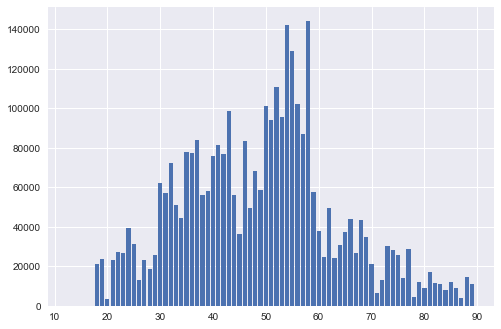

In [ ]:
plt.bar(customerInformation['age'],customerInformation['income'])

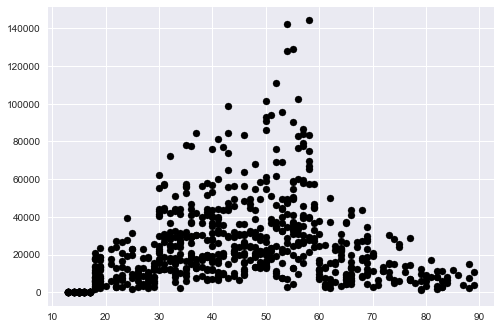

In [ ]:
plt.scatter(customerInformation['age'],customerInformation['income'],c='black')

In [ ]:
plt.bar(customerInformation['age'],customerInformation['income'])

In [ ]:
accountCustomerInformation = customerInformation.merge(accountInformation,on="cust_id")

In [ ]:
accountCustomerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,postal_code,city_name,state_code,acct_nbr,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,4561143213624870,CC,Y,8.8.1995,NaN,0.00,1548.23
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,13624873,SV,N,27.6.1994,25.8.1995,651.73,12.89
2,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,13624872,CK,Y,12.1.1995,NaN,2781.07,1401.21
3,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,90024,Los Angeles,CA,4561143213631600,CC,Y,12.10.1988,NaN,657.46,286.69
4,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,90024,Los Angeles,CA,13631603,SV,Y,9.5.1988,NaN,113.04,122.54


In [ ]:
accountCustomerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,postal_code,city_name,state_code,acct_nbr,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,4561143213624870,CC,Y,8.8.1995,NaN,0.00,1548.23
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,13624873,SV,N,27.6.1994,25.8.1995,651.73,12.89
2,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,13624872,CK,Y,12.1.1995,NaN,2781.07,1401.21
3,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,90024,Los Angeles,CA,4561143213631600,CC,Y,12.10.1988,NaN,657.46,286.69
4,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,90024,Los Angeles,CA,13631603,SV,Y,9.5.1988,NaN,113.04,122.54
